In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [148]:
df = pd.read_csv("D:/Churn_Modelling.csv")

In [150]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [152]:
df.columns = df.columns.str.lower()
df['churn'] = df['exited']
df = df.rename(columns={
    'rownumber': 'row_number',
    'customerid': 'customer_id',
    'creditscore': 'credit_score',
    'estimatedsalary': 'estimated_salary',
    'numofproducts': 'num_of_products',
    'hascrcard': 'has_cr_card',
    'isactivemember': 'is_active_member'
})

In [158]:
df = df.drop(columns=['row_number', 'customer_id', 'surname', 'exited'])
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [164]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(df[col].value_counts())

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
gender
Male      5457
Female    4543
Name: count, dtype: int64


In [166]:
df.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [168]:
df['churn'].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

__There is a clear Class imbalance Which indicates that later in the evaluation stage accuracy is not the best measure and AUC ROC score , Precision and Recall are better__

In [171]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in cat_cols:
    le = LabelEncoder() 
    df_encoded[col] = le.fit_transform(df_encoded[col])

x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

mi = mutual_info_classif(x, y, discrete_features=True)
mi_series = pd.Series(mi, index=x.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series)

estimated_salary    0.505489
balance             0.360038
age                 0.074316
num_of_products     0.069953
credit_score        0.026719
geography           0.014017
is_active_member    0.012291
gender              0.005652
tenure              0.000703
has_cr_card         0.000025
dtype: float64


C:\Users\aliel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\aliel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


**Estimated Salary and Balance are the 2 most driving Factors, while Tenure and credit card has no predictive power** 


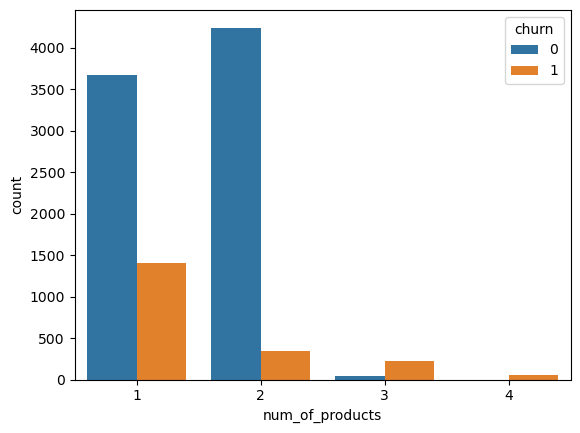

In [181]:
sns.countplot(data=df , x='num_of_products', hue='churn')
plt.show()

__The majority of loyal customers have either 1 or 2 products__

__Customers who churn are mostly in the 1 product group__

__Customers with 3 or 4 products have an extremly high churn rate, having 3 or 4 products seems to be a major churn driver__

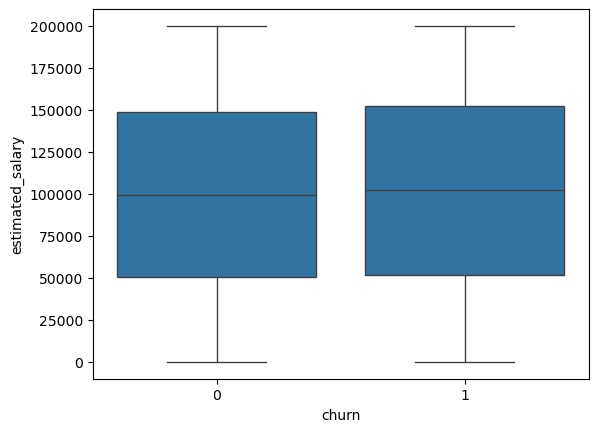

In [175]:
sns.boxplot(data=df, x='churn', y='estimated_salary')
plt.show()

**The BOX plot shows that there are no difference between churners and non churners**

__However since the MI score was high this strongly suggests that the relationship in non-linear or complex__

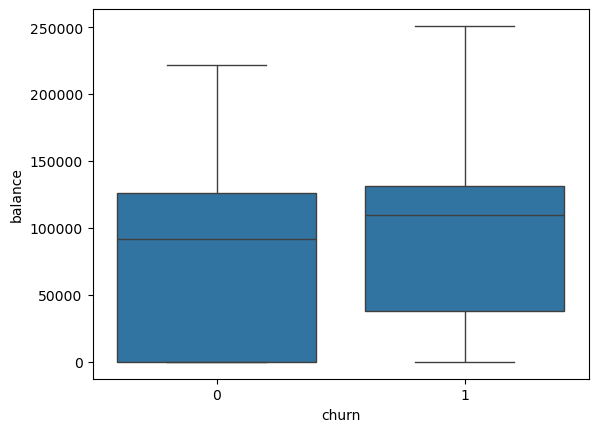

In [187]:
sns.boxplot(data=df, x='churn', y='balance')
plt.show()

__Customers who churn have a higher median balance than who stay__

__Customers with lower balance are very loyal, while customers with high balance are more likely to churn__

In [192]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['churn'].values
y_test = df_test['churn'].values
y_val = df_val['churn'].values

x_train = df_train.drop('churn', axis=1)
x_test = df_test.drop('churn', axis=1)
x_val = df_val.drop('churn', axis=1)


In [194]:
train_dict = x_train.to_dict(orient='records')
val_dict = x_val.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
x_train_encoded = dv.fit_transform(train_dict)
x_val_encoded = dv.transform(val_dict)


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(x_train_encoded, y_train)

y_pred_lr = lr.predict_proba(x_val_encoded)[:, 1]

auc_lr = roc_auc_score(y_val, y_pred_lr)
print(f"Logistic Regeression AUC: {auc_lr: .4f}")

Logistic Regeression AUC:  0.6871


In [199]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(x_train_encoded, y_train)

y_pred_rf = rf.predict_proba(x_val_encoded)[:, 1]

auc_rf = roc_auc_score(y_val, y_pred_rf)
print(f"Random Forest AUC: {auc_rf: .4f}")

Random Forest AUC:  0.8549


In [201]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train_encoded, y_train)

y_pred_dt = dt.predict_proba(x_val_encoded)[:, 1]

auc_dt = roc_auc_score(y_val, y_pred_dt)
print(f"Decision Tree AUC: {auc_dt: .4f}")

Decision Tree AUC:  0.8294


In [205]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric = 'logloss')
xgb.fit(x_train_encoded, y_train)

y_pred_xgb = xgb.predict_proba(x_val_encoded)[:, 1]

auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"XGBoost AUC: {auc_xgb: .4f}")

XGBoost AUC:  0.8448


C:\Users\aliel\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


__The  best Model is Random Forest Classifier__

In [212]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train_encoded, y_train)
print(grid_search.best_params_)
print(f"Best AUC is: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best AUC is: 0.8542


In [214]:
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_leaf=5, 
    max_depth=10, 
    n_jobs=-1,
    random_state=42
)

x_train_full = np.concatenate([x_train_encoded, x_val_encoded]) 
y_train_full = np.concatenate([y_train, y_val])

model.fit(x_train_full, y_train_full)

x_test_dict = x_test.to_dict(orient='records')
x_test_encoded = dv.transform(x_test_dict)

y_pred = model.predict_proba(x_test_encoded)[:, 1]

auc_final = roc_auc_score(y_test, y_pred)
print(f"Final Model AUC : {auc_final:.4f}")

Final Model AUC : 0.8696


In [216]:
import pickle

with open('dv.bin', 'wb') as f_out:
    pickle.dump(dv, f_out)


with open('model.bin', 'wb') as f_out:
    pickle.dump(model, f_out)